In [19]:
import sys
import os
sys.path.append('../src')

from mpradb.database.mpra_db import MPRA_DB
from mpradb.db_plot import plot_enrichment, plot_replicates
from mpradb.database.db_to_sqlite import DB_SQLite


In [23]:
db_obj = MPRA_DB(db_path='utr5.db',schema_path='doc/db_schema.sql',output_path='example')

In [15]:
for tab,values in db_obj.table_columns.items():
    if any(['reporter_group' in val for val in values]):
        print(tab,values)

reporter_group_attribute ['reporter_group_id', 'reporter_group_type', 'reporter_group_hash', 'reporter_group_name', 'reporter_group_description']
reporter_group_to_reporter_group_iso ['reporter_group_id', 'reporter_group_parent_id']
reporter_group_to_data_group_iso ['reporter_group_id', 'data_group_id']
reporter_group_to_reporter_iso ['reporter_group_id', 'reporter_id']
feature_enrichment_iso ['reporter_group_id', 'feature_id', 'enrichment_pvalue', 'enrichment_fold_change']
feature_correlation_iso ['feature_id', 'reporter_group_id', 'data_group_id', 'correlation', 'pvalue']


In [4]:
df = db_obj[['reporter_id','data_id','reporter_group_id','reporter_group_name','reporter_name','reporter_group_name','processed_data_value']].to_df()

df

,reporter_id,data_id,reporter_group_id,reporter_group_name,reporter_name,reporter_group_name,processed_data_value
0,0,0,0,polyA_fish,ENSDART00000038495_0,polyA_fish,1.983092
1,0,0,1,polyA_fish_hek293t,ENSDART00000038495_0,polyA_fish_hek293t,1.983092
2,0,0,2,polyA_hek293t,ENSDART00000038495_0,polyA_hek293t,1.983092
3,0,0,4,pa_2hpf-translation,ENSDART00000038495_0,pa_2hpf-translation,1.983092
4,0,0,6,pa_6hpf-translation,ENSDART00000038495_0,pa_6hpf-translation,1.983092
...,...,...,...,...,...,...,...
316979,11086,7,8,s1_pa_2hpf-translation-s2_pa_6hpf-translation,XIAP_hs_IRES_13,s1_pa_2hpf-translation-s2_pa_6hpf-translation,1.641841
316980,11086,7,14,pa_6hpf-translation,XIAP_hs_IRES_13,pa_6hpf-translation,1.641841
316981,11086,7,18,s1_pa_2hpf-translation-s2_pa_6hpf-translation,XIAP_hs_IRES_13,s1_pa_2hpf-translation-s2_pa_6hpf-translation,1.641841
316982,11086,7,23,s1_pa_2hpf-translation-s2_hek293t_12h-translation,XIAP_hs_IRES_13,s1_pa_2hpf-translation-s2_hek293t_12h-translation,1.641841


In [18]:
df = db_obj.select(['reporter_group_id','reporter_group_parent_id','reporter_group_name','reporter_group_description','reporter_group_type']).to_df()
df

,reporter_group_id,reporter_group_parent_id,reporter_group_name,reporter_group_description,reporter_group_type
0,3,0,pa_2hpf-translation,"selector: 0, reporter number: 0.1",repressed
1,4,0,pa_2hpf-translation,"selector: 0, reporter number: 0.1",active
2,5,0,pa_6hpf-translation,"selector: 0, reporter number: 0.1",repressed
3,6,0,pa_6hpf-translation,"selector: 0, reporter number: 0.1",active
4,7,0,s1_pa_2hpf-translation-s2_pa_6hpf-translation,"selector: 0, reporter number: 0.1",repressed
5,8,0,s1_pa_2hpf-translation-s2_pa_6hpf-translation,"selector: 0, reporter number: 0.1",active
6,9,0,s1_pa_2hpf-translation-s2_pa_6hpf-translation,"selector: 0, reporter number: 0.1",s1_activated
7,10,0,s1_pa_2hpf-translation-s2_pa_6hpf-translation,"selector: 0, reporter number: 0.1",s2_activated
8,11,1,pa_2hpf-translation,"selector: 1, reporter number: 0.1",repressed
9,12,1,pa_2hpf-translation,"selector: 1, reporter number: 0.1",active


/home/FCAM/smadhavan/naptrap_protocol/src/mpradb/db_plot/plotter.py:159: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s = s, alpha = alpha, c = c, edgecolor = edgecolor, cmap = cmap, rasterized= rasterized)


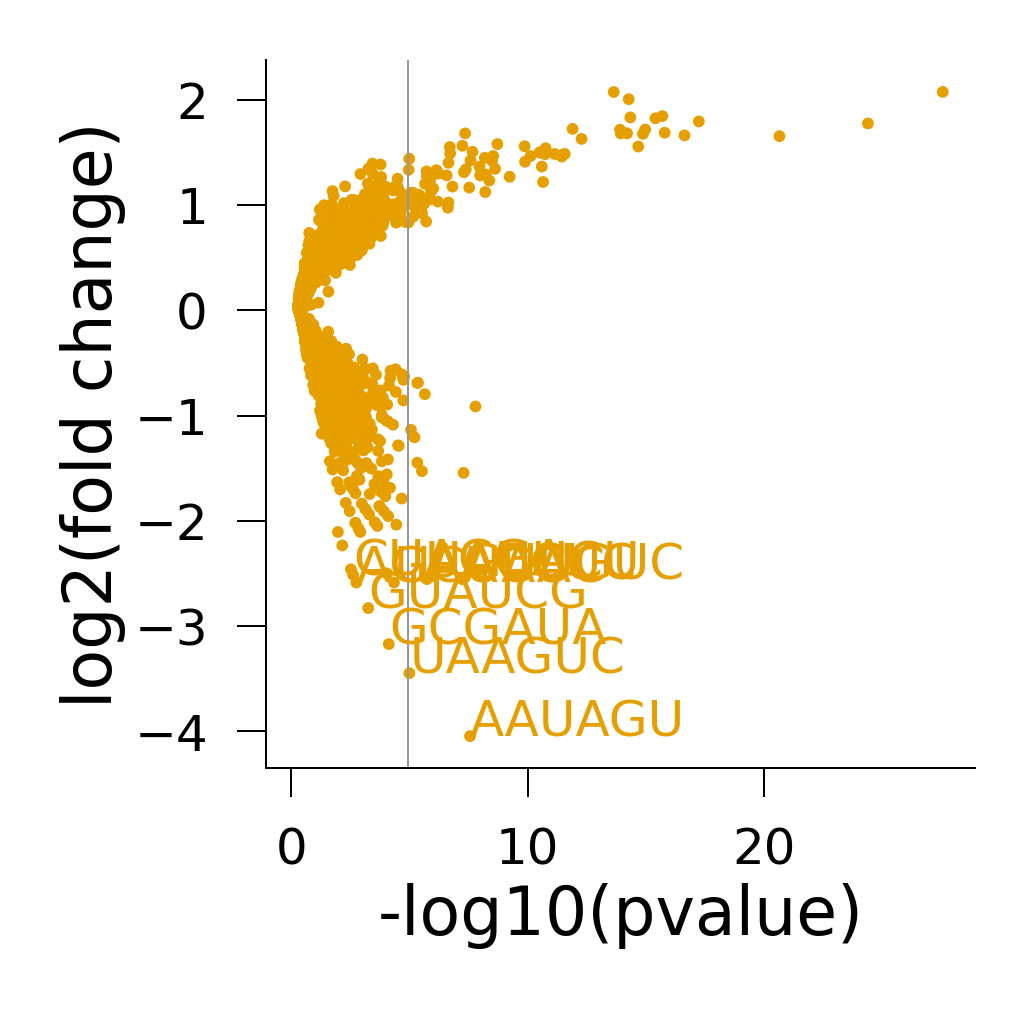

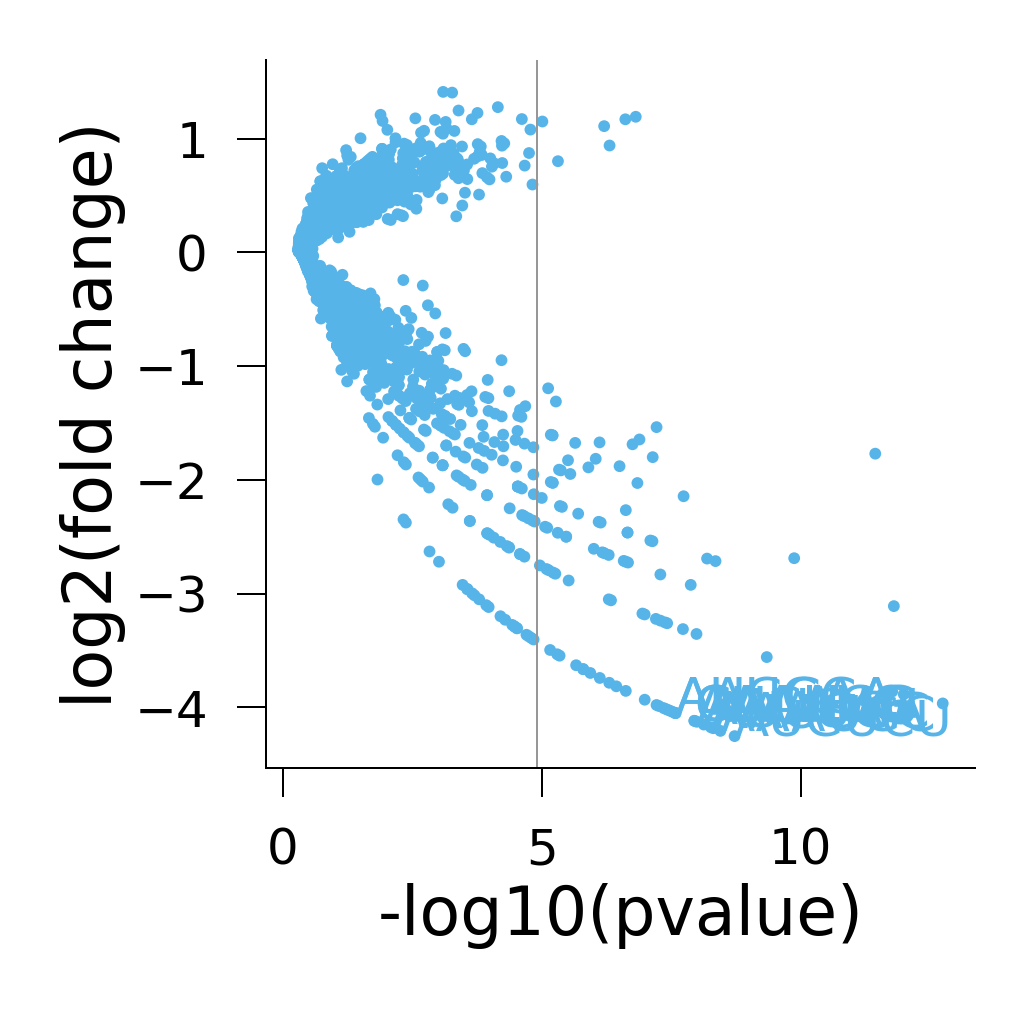

In [10]:
plot_enrichment.plot_enrichment(db_obj,selector_id=2)

In [20]:
plot_replicates.plot_replicates(db_obj,'pa_2hpf-translation')

AttributeError: 'DB_SQLite' object has no attribute 'output_path'